# 📑 Evaluación de WhyXrayCLIP en ROCO

Este notebook forma parte del proyecto de tesis sobre **medición del balance multimodal en modelos CLIP aplicados a dominios médicos**.

**Modelo**: WhyXrayCLIP  
**Dataset**: ROCO (Radiology Objects in COntext)  
**Tarea**: ISA (Image-Sentence Alignment)



## Cargar modelos y datos

In [ ]:
import os
from pathlib import Path

# 📌 Configuración - Asegurar que estamos en el directorio correcto
# Funciona tanto en scripts como en notebooks
try:
    # En scripts Python
    PROJECT_ROOT = Path(__file__).parent.parent
except NameError:
    # En notebooks de Jupyter
    PROJECT_ROOT = Path.cwd()
    # Si estamos en experiments/, subir un nivel
    if PROJECT_ROOT.name == "experiments":
        PROJECT_ROOT = PROJECT_ROOT.parent

os.chdir(PROJECT_ROOT)
CFG_PATH = "configs/roco_isa_whyxrayclip.yaml"

from mmshap_medclip.tasks.whyxrayclip import filter_roco_by_keywords

CHESTXRAY_KEYWORDS = ("chest x-ray", "lung")

# Asegura que cfg, device, dataset y model estén listos en esta sesión
if not all(k in globals() for k in ("cfg", "device", "dataset", "model")):
    from mmshap_medclip.io_utils import load_config
    from mmshap_medclip.registry import build_dataset, build_model
    from mmshap_medclip.devices import get_device

    cfg = load_config(CFG_PATH)
    device = get_device(cfg.get("device", "auto"))
    dataset = build_dataset(cfg["dataset"])
    model = build_model(cfg["model"], device=device)

# Filtra a radiografías de tórax/pulmón
dataset = filter_roco_by_keywords(dataset, keywords=CHESTXRAY_KEYWORDS)

print("OK → len(dataset) =", len(dataset), "(subset radiografías)", "| device =", device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


OK → len(dataset) = 457 (subset radiografías) | device = cuda


## Ejecutar SHAP en una muestra

logit=2334.0000  TScore=25.04%  IScore=74.96%


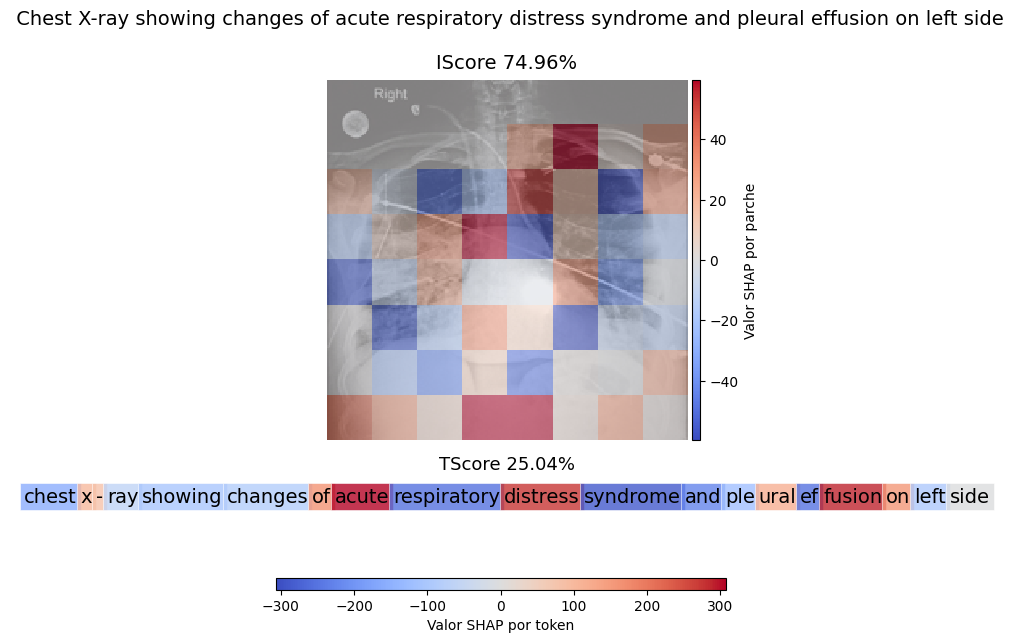

In [ ]:
# 📌 Código
from mmshap_medclip.tasks.isa import run_isa_one

muestra = 380
sample = dataset[muestra]
image, caption = sample['image'], sample['text']

res = run_isa_one(model, image, caption, device, explain=True, plot=True)
print(f"logit={res['logit']:.4f}  TScore={res['tscore']:.2%}  IScore={res['iscore']:.2%}")